In [178]:
import pandas as pd
from plotnine import *
import numpy as np
import re
import copy

%matplotlib inline

# Day 1
## Part 1

In [16]:
df = pd.read_csv("data/input1.txt", header=None, names=["Expense"])

In [17]:
df

,Expense
0,1287
1,1366
2,1669
3,1724
4,1338
...,...
195,1862
196,1430
197,1793
198,1901


In [18]:
def sum2020(data):
    for i in range(len(data)):
        for j in range(i, len(data)):
            if data[i] + data[j] == 2020:
                print(data[i], data[j])
                return data[i] * data[j]

In [19]:
sample = [1721, 979, 366, 299, 675, 1456]
sum2020(sample)

1721 299


514579

In [20]:
sum2020(df["Expense"].values)

437 1583


691771

## Part 2

In [21]:
def sumthree2020(data):
    for i in range(len(data)):
        for j in range(i, len(data)):
            for k in range(j, len(data)):
                if data[i] + data[j] + data[k] == 2020:
                    print(data[i], data[j], data[k])
                    return data[i] * data[j] * data[k]

In [22]:
sample = [1721, 979, 366, 299, 675, 1456]
sumthree2020(sample)

979 366 675


241861950

In [23]:
sumthree2020(df["Expense"].values)

717 335 968


232508760

# Day 2
## Part 1

In [24]:
sample = ["1-3 a: abcde", "1-3 b: cdefg", "2-9 c: ccccccccc"]

In [25]:
def num_valid(pwords):
    count = 0
    for p in pwords:
        pieces = p.split()
        t = pieces[2].count(pieces[1][0])
        low, high = [int(x) for x in pieces[0].split("-")]
        if low <= t <= high:
            count += 1
    return count

In [26]:
num_valid(sample)

2

In [27]:
fin = open("data/input2.txt")
data = fin.readlines()
fin.close()

In [28]:
num_valid(data)

636

## Part 2

In [29]:
def num_valid(pwords):
    count = 0
    for p in pwords:
        pieces = p.split()
        first, second = [int(x) - 1 for x in pieces[0].split("-")]
        nw = pieces[2][first] + pieces[2][second]
        c = pieces[1][0]
        if nw.count(c) == 1:
            count += 1
    return count

In [30]:
num_valid(sample)

1

In [31]:
num_valid(data)

588

# Day 3
## Puzzle 1

In [32]:
sample = ["..##.......",
"#...#...#..",
".#....#..#.",
"..#.#...#.#",
".#...##..#.",
"..#.##.....",
".#.#.#....#",
".#........#",
"#.##...#...",
"#...##....#",
".#..#...#.#",
]

In [33]:
sample

['..##.......',
 '#...#...#..',
 '.#....#..#.',
 '..#.#...#.#',
 '.#...##..#.',
 '..#.##.....',
 '.#.#.#....#',
 '.#........#',
 '#.##...#...',
 '#...##....#',
 '.#..#...#.#']

In [34]:
def num_trees(right, down, trees):
    count = 0
    loc = [0, 0]
    while loc[0] < len(trees):
        loc[0] += down
        loc[1] += right
        loc[1] %= len(trees[0])
        if loc[0] < len(trees):
            #print(loc, trees[loc[0]][loc[1]])
            if trees[loc[0]][loc[1]] == "#":
                count += 1
    return count

In [35]:
num_trees(3, 1, sample)

7

In [36]:
fin = open("data/input3.txt")
treemap = [line.strip() for line in fin.readlines()]
fin.close()

In [37]:
num_trees(3, 1, treemap)

191

## Part 2

In [38]:
slopes = [(1, 1), (3, 1), (5, 1), (7, 1), (1, 2)]

In [39]:
def all_paths(slope_list, data):
    num = 1
    for r, d in slopes:
        num *= num_trees(r, d, data)
    return num

In [40]:
all_paths(slopes, sample)

336

In [41]:
all_paths(slopes, treemap)

1478615040

# Day 4
## Part 1

In [2]:
expected = set(["byr", "iyr", "eyr", "hgt", "hcl", "ecl", "pid", "cid"])

In [3]:
np_expected = expected.copy()
np_expected.remove("cid")

In [4]:
def make_pdict(s):
    d = {}
    for field in s.split():
        k, v = field.split(":")
        d[k] = v
    return d

In [5]:
def get_data(filename):
    passports = []
    fin = open(filename)
    current = ""
    for line in fin:
        if line.strip() != "":
            current += " " + line.strip()
        else:
            passports.append(make_pdict(current))
            current = ""
    passports.append(make_pdict(current))
    return passports

In [6]:
def count_valid(filename):
    count = 0
    ps = get_data(filename)
    for p in ps:
        if set(p.keys()).issuperset(np_expected):
            count += 1
    return count

In [7]:
count_valid("data/input4sample.txt")

2

In [8]:
count_valid("data/input4.txt")

242

## Part 2

In [9]:
def int_valid(s, low, high):
    if not s.isdigit():
        return False
    y = int(s)
    return low <= y <= high

In [10]:
int_valid("2003", 1920, 2002)

False

In [11]:
def length_valid(s, low, high, num):
    return len(s) == num and int_valid(s, low, high)

In [12]:
def count_valid(filename):
    data = {}
    for field in np_expected:
        data[field] = []
    
    count = 0
    ps = get_data(filename)
    for p in ps:
        if set(p.keys()).issuperset(np_expected):
            valid = True
            valid &= length_valid(p["byr"], 1920, 2002, 4)
            valid &= length_valid(p["iyr"], 2010, 2020, 4)
            valid &= length_valid(p["eyr"], 2020, 2030, 4)
            #hgt
            hgt = p["hgt"]
            if hgt[-2:] == "cm":
                valid &= int_valid(hgt[:-2], 150, 193)
            elif hgt[-2:] == "in":
                valid &= int_valid(hgt[:-2], 59, 76)
            else:
                valid = False
            #hcl https://stackoverflow.com/questions/30241375/python-how-to-check-if-string-is-a-hex-color-code
            valid &= bool(re.search(r'^#(?:[0-9a-fA-F]{3}){1,2}$', p["hcl"]))
            valid &= p["ecl"] in {"amb","blu","brn","gry","grn","hzl","oth"}
            valid &= length_valid(p["pid"], 0, 999999999, 9)
            if valid:
                for field in np_expected:
                    if field == "hgt":
                        hgt = p["hgt"]
                        if hgt[-2:] == "cm":
                            data[field].append(int(hgt[:-2]) * 0.393701)
                        else:
                            data[field].append(int(hgt[:-2]))
                    else:
                        data[field].append(p[field])
                count += 1
    return count, data

In [13]:
count_valid("data/input4-2valid.txt")

(4,
 {'hgt': [74, 64.960665, 64.566964, 62.204758000000005],
  'byr': ['1980', '1989', '2001', '1944'],
  'iyr': ['2012', '2014', '2015', '2010'],
  'eyr': ['2030', '2029', '2022', '2021'],
  'ecl': ['grn', 'blu', 'hzl', 'blu'],
  'hcl': ['#623a2f', '#a97842', '#888785', '#b6652a'],
  'pid': ['087499704', '896056539', '545766238', '093154719']})

In [14]:
count_valid("data/input4-2invalid.txt")

(0,
 {'hgt': [], 'byr': [], 'iyr': [], 'eyr': [], 'ecl': [], 'hcl': [], 'pid': []})

In [15]:
c, data = count_valid("data/input4.txt")

In [16]:
c

186

In [17]:
df = pd.DataFrame(data)
df["byr"] = pd.to_datetime(df["byr"])

In [18]:
df

,hgt,byr,iyr,eyr,ecl,hcl,pid
0,63.385861,1977-01-01,2011,2027,grn,#a97842,910468396
1,73.228386,1941-01-01,2012,2029,gry,#cfa07d,108935675
2,59.448851,1966-01-01,2012,2020,grn,#ceb3a1,947726115
3,61.023655,1966-01-01,2012,2027,hzl,#888785,853607760
4,75.196891,1923-01-01,2019,2025,gry,#a97842,574171850
...,...,...,...,...,...,...,...
181,61.811057,1981-01-01,2020,2020,amb,#7d3b0c,854208004
182,66.929170,1924-01-01,2010,2028,amb,#cfa07d,036669613
183,68.110273,1966-01-01,2010,2028,grn,#ceb3a1,074363489
184,68.897675,1952-01-01,2016,2024,brn,#fffffd,085432899


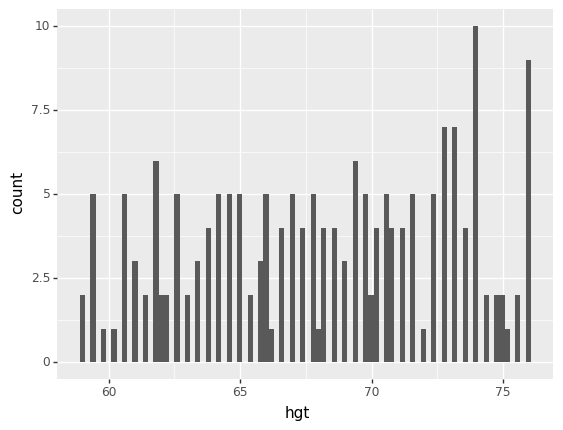

<ggplot: (8778598789235)>

In [19]:
ggplot(df, aes(x="hgt")) \
+ geom_histogram(bins=86)

In [20]:
df.to_csv("data/valid_travelers.csv")

In [21]:
from libs.graphics import *

ec = {"amb":"#ffbf00",
      "blu":"#85abce",
      "brn":"#654321",
      "gry":"#c2c5cc",
      "grn":"#6ca580",
      "hzl":"#b5ae6e",
      "oth":"#800080"}

def main():
    win = GraphWin("My First Drawing", 1200, 1200)

    for i, row in df.iterrows():
        r = Rectangle(Point(30 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), Point(50 + (i % 33) * 35, 100 + 110 * (i // 33)))
        r.setFill("#000000")

        r.draw(win)
        #s = Line(Point(10, 50), Point(70, 60))

        c = Circle(Point(40 + (i % 33) * 35, 100 - row["hgt"] - 5 + 110 * (i // 33)), 10)
        c.draw(win)
        c.setFill(row["hcl"])
        c.setOutline(row["hcl"])
        c = Circle(Point(40 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 9)
        c.draw(win)
        c.setOutline("#a1665e")
        c.setFill("#a1665e")
        c = Circle(Point(35 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 3)
        c.draw(win)
        c.setOutline("#FFFFFF")
        c.setFill(ec[row["ecl"]])
        c = Circle(Point(45 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 3)
        c.draw(win)
        c.setOutline("#FFFFFF")
        c.setFill(ec[row["ecl"]])
        #s.draw(win)

    win.getMouse()
    win.close()

main()

KeyboardInterrupt: 

# Day 5
## Part 1

In [34]:
def bsearch(s, space, small):
    l, h = 0, space * 2
    for d in s:
        if d == small:
            h -= space
        else:
            l += space
        space //= 2
    return l  

In [35]:
def seat(bsp):
    row = bsearch(bsp[:7], 64, "F")
    column = bsearch(bsp[7:], 4, "L")
    sid = row * 8 + column
    #print(row, column, sid)
    return sid

In [36]:
seat("FBFBBFFRLR") # 357  44 * 8 + 5

357

In [37]:
seat("BFFFBBFRRR")# : row 70, column 7, seat ID 567.

567

In [38]:
seat("FFFBBBFRRR")# : row 14, column 7, seat ID 119.

119

In [39]:
seat("BBFFBBFRLL")# : row 102, column 4, seat ID 820.")

820

In [40]:
def sanity():
    fin = open("data/input5.txt")
    data = fin.readlines()
    fin.close()
    max_id = 0
    for line in data:
        sid = seat(line.strip())
        if sid > max_id:
            max_id = sid
    return max_id

In [41]:
sanity()

835

## Part 2

In [42]:
def missing():
    fin = open("data/input5.txt")
    data = fin.readlines()
    fin.close()
    open_seats = set(range(836))
    for line in data:
        sid = seat(line.strip())
        open_seats.remove(sid)
    return open_seats

In [43]:
missing()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 649}

# Day 6
## Part 1

In [55]:
def common():
    fin = open("data/input6.txt")
    data = fin.readlines()
    fin.close()
    common = set()
    total = 0
    current = ""
    for line in data:
        if line.strip() != "":
            current += line.strip()
        else:
            total += len(set(current))
            current = ""
    total += len(set(current))
    return total

In [56]:
set("abc")

{'a', 'b', 'c'}

In [57]:
common()

6763

## Part 2

In [88]:
def common2():
    fin = open("data/input6.txt")
    data = fin.readlines()
    fin.close()
    total = 0
    current = ""
    for line in data:
        if line.strip() != "":
            current += line
        else:
            people = current.split("\n")
            #print(people)
            common = set(people[0])
            #print(common)
            for p in people[1:-1]:
                common = common.intersection(set(p))
                #print(common)
            total += len(common)
            #print(total)
            current = ""
    people = current.split("\n")
    common = set(people[0])
    #print(common)
    for p in people[1:-1]:
        common = common.intersection(set(p))
        #print(common)
    total += len(common)
    return total

In [89]:
x = common2()

In [90]:
x

3512

# Day 7
## Part 1

In [131]:
def containers(filename):
    c = {}
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    for line in data:
        # https://howtodoinjava.com/python/functions/split-string/
        #print(line.strip())
        big, little = re.split(r' bags contain ', line.strip()) #  line.strip().split(" contain ")
        for piece in little.split(","):
            n = piece.split()
            if n[0] != "no":
                color = n[1] + " " + n[2]
                if color not in c:
                    c[color] = {}
                c[color][big] = int(n[0])
                #print(color + "->" + big + ":" + str(int(n[0])))
    return c

In [132]:
containers("data/input7sample.txt")

{'bright white': {'light red': 1, 'dark orange': 3},
 'muted yellow': {'light red': 2, 'dark orange': 4},
 'shiny gold': {'bright white': 1, 'muted yellow': 2},
 'faded blue': {'muted yellow': 9, 'dark olive': 3, 'vibrant plum': 5},
 'dark olive': {'shiny gold': 1},
 'vibrant plum': {'shiny gold': 2},
 'dotted black': {'dark olive': 4, 'vibrant plum': 6}}

In [133]:
def num_contain(color, dag):
    bigger = set()
    current = [color]
    while len(current) > 0:
        c = current.pop()
        bigger.add(c)
        if c in dag:
            for oc in dag[c]:
                current.append(oc)
    #print(bigger)
    return len(bigger) - 1

In [139]:
num_contain("shiny gold", containers("data/input7sample.txt"))

4

In [135]:
num_contain("shiny gold", containers("data/input7.txt"))

268

## Part 2

In [140]:
def containees(filename):
    c = {}
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    for line in data:
        # https://howtodoinjava.com/python/functions/split-string/
        #print(line.strip())
        big, little = re.split(r' bags contain ', line.strip()) #  line.strip().split(" contain ")
        if big not in c:
            c[big] = {}
        for piece in little.split(","):
            n = piece.split()
            if n[0] != "no":
                color = n[1] + " " + n[2]
                c[big][color] = int(n[0])
                #print(color + "->" + big + ":" + str(int(n[0])))
    return c

In [141]:
containees("data/input7sample.txt")

{'light red': {'bright white': 1, 'muted yellow': 2},
 'dark orange': {'bright white': 3, 'muted yellow': 4},
 'bright white': {'shiny gold': 1},
 'muted yellow': {'shiny gold': 2, 'faded blue': 9},
 'shiny gold': {'dark olive': 1, 'vibrant plum': 2},
 'dark olive': {'faded blue': 3, 'dotted black': 4},
 'vibrant plum': {'faded blue': 5, 'dotted black': 6},
 'faded blue': {},
 'dotted black': {}}

In [148]:
def num_contained(color, dag):
    total = 1
    for c in dag[color]:
        total += dag[color][c] * num_contained(c, dag)
    return total

In [150]:
num_contained("shiny gold", containees("data/input7sample.txt")) - 1

32

In [151]:
num_contained("shiny gold", containees("data/input7sample2.txt")) - 1

126

In [152]:
num_contained("shiny gold", containees("data/input7.txt")) - 1

7867

# Day 8
## Part 1

In [153]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    return [x.split() for x in data]

In [154]:
get_data("data/input8sample.txt")

[['nop', '+0'],
 ['acc', '+1'],
 ['jmp', '+4'],
 ['acc', '+3'],
 ['jmp', '-3'],
 ['acc', '-99'],
 ['acc', '+1'],
 ['jmp', '-4'],
 ['acc', '+6']]

In [157]:
def loopval(data):
    address = 0
    val = 0
    seen = set()
    while address not in seen:
        seen.add(address)
        inst, change = data[address]
        change = int(change)
        if inst == "nop":
            address += 1
        elif inst == "acc":
            address += 1
            val += change
        elif inst == "jmp":
            address += change
    return val

In [158]:
loopval(get_data("data/input8sample.txt"))

5

In [159]:
loopval(get_data("data/input8.txt"))

1475

## Part 2

In [166]:
def loopval(data):
    address = 0
    val = 0
    seen = set()
    while address not in seen and address < len(data):
        seen.add(address)
        inst, change = data[address]
        change = int(change)
        if inst == "nop":
            address += 1
        elif inst == "acc":
            address += 1
            val += change
        elif inst == "jmp":
            address += change
    return val, address == len(data)

In [167]:
loopval(get_data("data/input8sample.txt"))

(5, False)

In [182]:
data = get_data("data/input8sample.txt")

In [183]:
c = copy.deepcopy(data)
data[-2][0] = "nop"

In [184]:
loopval(data)

(8, True)

In [185]:
c

[['nop', '+0'],
 ['acc', '+1'],
 ['jmp', '+4'],
 ['acc', '+3'],
 ['jmp', '-3'],
 ['acc', '-99'],
 ['acc', '+1'],
 ['jmp', '-4'],
 ['acc', '+6']]

In [191]:
def fixloop(data):
    for i in range(len(data)):
        c = copy.deepcopy(data)
        if c[i][0] == "nop":
            c[i][0] = "jmp"
        elif c[i][0] == "jmp":
            c[i][0] = "nop"
        acc, status = loopval(c)
        if status:
            return acc

In [190]:
fixloop(get_data("data/input8sample.txt"))

0 False
5 False
4 False
5 False
-94 False
5 False
5 False
8 True


8

In [192]:
fixloop(get_data("data/input8.txt"))

1270

# Day 9
## Part 1

In [212]:
def pair_sum(data, target):
    #print(data)
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if data[i] + data[j] == target:
                #print(data[i], data[j])
                return True
    return False

In [226]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    return [int(x) for x in data]

In [227]:
def first_nosum(filename, window):
    data = get_data(filename)
    for i in range(window, len(data)):
        if not pair_sum(data[i - window:i], data[i]):
            return data[i]

In [228]:
first_nosum("data/input9sample.txt", 5)

127

In [229]:
first_nosum("data/input9.txt", 25)

1930745883

## Part 2

In [241]:
def weakness(filename, window):
    data = get_data(filename)
    missing = first_nosum(filename, window)
    start = 0
    end = 1
    total = data[start] + data[end]
    #print(total, missing)
    while total != missing:
        #print(start, end, total, missing)

        if total < missing:
            end += 1
            total += data[end]
        elif total > missing:
            total -= data[start]
            start += 1
    return min(data[start:end + 1]) + max(data[start:end + 1])

In [242]:
weakness("data/input9sample.txt", 5)

62

In [243]:
weakness("data/input9.txt", 25)

268878261

# Day 10
## Part 1

In [244]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    return [int(x) for x in data]

In [249]:
def diffs(data):
    one = 0
    three = 1
    data.append(0)
    data.sort()
    for i in range(len(data) - 1):
        if data[i + 1] - data[i] == 1:
            one += 1
        elif data[i + 1] - data[i] == 3:
            three += 1
    return one * three

In [250]:
diffs(get_data("data/input10sample.txt"))

35

In [251]:
diffs(get_data("data/input10sample2.txt"))

220

In [252]:
diffs(get_data("data/input10.txt"))

2664

## Part 2

Time for dynamic programming!

In [262]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    d = [0] + [int(x) for x in data]
    d.sort()
    d.append(d[-1] + 3)
    return d

In [263]:
def diffs(data):
    one = 0
    three = 0
    for i in range(len(data) - 1):
        if data[i + 1] - data[i] == 1:
            one += 1
        elif data[i + 1] - data[i] == 3:
            three += 1
    return one * three

In [266]:
diffs(get_data("data/input10.txt"))

2664

In [314]:
def combos(data):
    counts = np.zeros(len(data), dtype=int)
    counts[0] = 1
    for i in range(1, len(data)):
        for j in range(1, 4):
            if i - j >= 0 and 1 <= data[i] - data[i - j] <= 3:
                counts[i] += counts[i - j]
    print(data)
    print(counts)
    return counts[-1]

In [315]:
combos(get_data("data/input10sample.txt"))

[0, 1, 4, 5, 6, 7, 10, 11, 12, 15, 16, 19, 22]
[1 1 1 1 2 4 4 4 8 8 8 8 8]


8

In [316]:
combos(get_data("data/input10sample2.txt"))

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31, 32, 33, 34, 35, 38, 39, 42, 45, 46, 47, 48, 49, 52]
[    1     1     2     4     7     7     7    14    28    49    49    49
    49    98   196   196   196   392   392   392   392   784  1568  2744
  2744  2744  2744  2744  2744  5488 10976 19208 19208]


19208

In [317]:
combos(get_data("data/input10.txt"))

[0, 1, 2, 3, 6, 7, 8, 9, 10, 13, 16, 17, 18, 21, 22, 25, 28, 29, 30, 33, 34, 35, 36, 37, 40, 43, 44, 45, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 63, 66, 67, 68, 69, 72, 75, 78, 79, 80, 81, 82, 85, 88, 91, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 115, 118, 119, 122, 123, 124, 125, 126, 129, 132, 133, 134, 135, 138, 139, 140, 141, 144, 147, 148, 149, 150, 153, 156, 157, 158, 159, 160, 163, 166, 167, 168, 169, 172, 173, 174, 177, 178, 179, 180, 183]
[              1               1               2               4
               4               4               8              16
              28              28              28              28
              56              56              56              56
              56              56             112             112
             112             224             448             784
             784             784             784            1568
            3136            3136            3136            6

148098383347712

# Day 11
## Parts 1 and 2

Coded with [Mesa](https://mesa.readthedocs.io/en/stable/)

In [318]:
from mesa import Agent


class Cell(Agent):
    """Represents a single ALIVE or DEAD cell in the simulation."""

    DEAD = 0
    ALIVE = 1
    FLOOR = 2

    def __init__(self, pos, model, init_state=DEAD, part="Part 1"):
        """
        Create a cell, in the given state, at the given x, y position.
        """
        super().__init__(pos, model)
        self.x, self.y = pos
        self.state = init_state
        self._nextState = None
        self.part = part

    @property
    def isAlive(self):
        return self.state == self.ALIVE
    
    @property
    def isDead(self):
        return self.state == self.DEAD

    @property
    def neighbors(self):
        return self.model.grid.neighbor_iter((self.x, self.y), True)

    def step(self):
        if self.part == "Part 1":
            self.step1()
        else:
            self.step2()
    
    def step1(self):
        """
        Compute if the cell will be dead or alive at the next tick.  This is
        based on the number of alive or dead neighbors.  The state is not
        changed here, but is just computed and stored in self._nextState,
        because our current state may still be necessary for our neighbors
        to calculate their next state.
        """

        # Get the neighbors and apply the rules on whether to be alive or dead
        # at the next tick.
        live_neighbors = sum(neighbor.isAlive for neighbor in self.neighbors)

        # Assume nextState is unchanged, unless changed below.
        self._nextState = self.state
        if self.isAlive:
            if live_neighbors >= 4:
                self._nextState = self.DEAD
        elif self.isDead:
            if live_neighbors == 0:
                self._nextState = self.ALIVE

    def step2(self):
        """
        Compute if the cell will be dead or alive at the next tick.  This is
        based on the number of alive or dead neighbors.  The state is not
        changed here, but is just computed and stored in self._nextState,
        because our current state may still be necessary for our neighbors
        to calculate their next state.
        """

        # Get the neighbors and apply the rules on whether to be alive or dead
        # at the next tick.
        #live_neighbors = sum(neighbor.isAlive for neighbor in self.neighbors)
        live_neighbors = 0
        for dx, dy in [(-1, -1), (-1, 0), (-1, 1), 
                        (0, -1),           (0, 1), 
                        (1, -1),  (1, 0),  (1, 1)]:
            finished = False
            i = 0
            while not finished:
                i += 1
                looking = (self.x + dx * i, self.y + dy * i)
                if self.model.grid.out_of_bounds(looking):
                    finished = True
                elif self.model.grid[looking[0]][looking[1]].isAlive:
                    live_neighbors += 1
                    finished = True
                elif self.model.grid[looking[0]][looking[1]].isDead:
                    finished = True

            
        # Assume nextState is unchanged, unless changed below.
        self._nextState = self.state
        if self.isAlive:
            if live_neighbors >= 5:
                self._nextState = self.DEAD
        elif self.isDead:
            if live_neighbors == 0:
                self._nextState = self.ALIVE

    def advance(self):
        """
        Set the state to the new computed state -- computed in step().
        """
        self.state = self._nextState


In [340]:
from mesa import Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector
from mesa.space import Grid

class ConwaysGameOfLife(Model):
    """
    Represents the 2-dimensional array of cells in Conway's
    Game of Life.
    """

    def __init__(self, data, height=10, width=10, part="Part 1"):
        """
        Create a new playing area of (height, width) cells.
        """

        # Set up the grid and schedule.

        # Use SimultaneousActivation which simulates all the cells
        # computing their next state simultaneously.  This needs to
        # be done because each cell's next state depends on the current
        # state of all its neighbors -- before they've changed.
        self.schedule = SimultaneousActivation(self)

        # Use a simple grid, where edges wrap around.
        self.grid = Grid(height, width, torus=False)

        self.dc = DataCollector(
            {
                "Empty": lambda m: self.count_type(m, Cell.DEAD),
                "Occupied": lambda m: self.count_type(m, Cell.ALIVE),
            }
        )

        self.numalive = 0
        
        # Place a cell at each location, with some initialized to
        # ALIVE and some to DEAD.
        for (contents, x, y) in self.grid.coord_iter():
            if data[(len(data) - 1) - y][x] == ".":
                state = Cell.FLOOR
            else:
                state = Cell.DEAD
            cell = Cell((x, y), self, state, part)
           
            self.grid.place_agent(cell, (x, y))
            self.schedule.add(cell)

        self.running = True
        self.dc.collect(self)


    def step(self):
        """
        Have the scheduler advance each cell by one step
        """
        print(self.numalive)
        prev = self.numalive
        self.schedule.step()
        self.schedule.step()
        self.dc.collect(self)

        self.numalive = self.count_type(self, Cell.ALIVE)
        if self.schedule.time > 84:
            self.running = False
        
    @staticmethod
    def count_type(model, condition):
        """
        Helper method to count trees in a given condition in a given model.
        """
        count = 0
        for spot in model.schedule.agents:
            if spot.state == condition:
                count += 1
        return count

In [341]:
fin = open("seating_day_11/seating/data/input11.txt")
data = fin.readlines()
fin.close()

In [342]:
seating1 = ConwaysGameOfLife(data, len(data[0].strip()), len(data), "Part 1")

In [343]:
seating1.run_model()

0
166
365
524
661
799
934
1087
1230
1371
1480
1592
1694
1785
1846
1898
1943
1983
2025
2057
2079
2103
2123
2141
2158
2172
2188
2198
2209
2218
2227
2233
2241
2245
2250
2254
2254
2254
2254
2254
2254
2254
2254


In [353]:
df1 = seating1.dc.get_model_vars_dataframe()
df1["Steps"] = range(0, len(df1) * 2, 2)

In [354]:
df1

,Empty,Occupied,Steps
0,7052,0,0
1,6886,166,2
2,6687,365,4
3,6528,524,6
4,6391,661,8
5,6253,799,10
6,6118,934,12
7,5965,1087,14
8,5822,1230,16
9,5681,1371,18


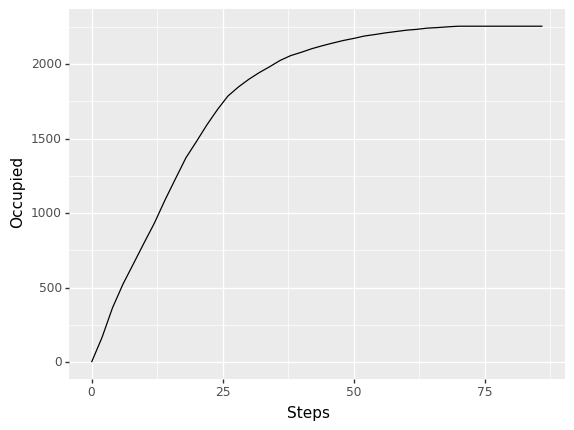

<ggplot: (8772859680196)>

In [355]:
ggplot(df1, aes(x="Steps", y="Occupied")) \
+ geom_line()

In [356]:
seating2 = ConwaysGameOfLife(data, len(data[0].strip()), len(data), "Part 2")

In [357]:
seating2.run_model()

0
4
12
24
41
61
82
108
141
177
214
259
308
363
426
490
559
644
725
804
890
976
1069
1162
1245
1319
1387
1467
1535
1592
1652
1706
1751
1800
1842
1876
1911
1938
1963
1978
1990
2000
2004


In [358]:
df2 = seating2.dc.get_model_vars_dataframe()

In [371]:
df1["Part Two"] = df2["Occupied"]
df1["Part One"] = df1["Occupied"]

In [372]:
df1

,Empty,Occupied,Steps,Part 1,Part 2,Part Two,Part One
0,7052,0,0,0,0,0,0
1,6886,166,2,166,4,4,166
2,6687,365,4,365,12,12,365
3,6528,524,6,524,24,24,524
4,6391,661,8,661,41,41,661
5,6253,799,10,799,61,61,799
6,6118,934,12,934,82,82,934
7,5965,1087,14,1087,108,108,1087
8,5822,1230,16,1230,141,141,1230
9,5681,1371,18,1371,177,177,1371


/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


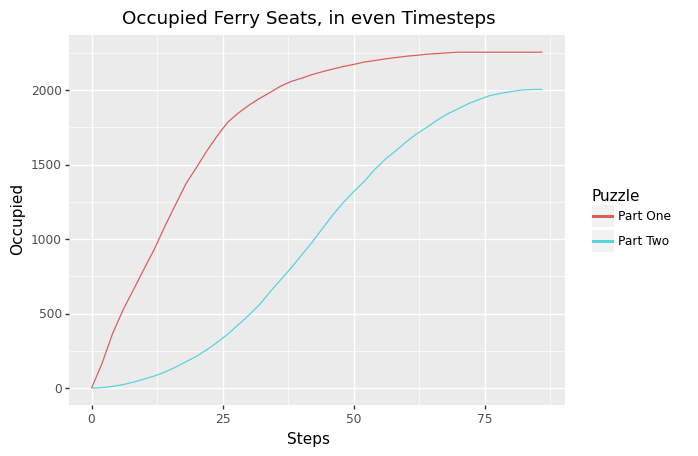

<ggplot: (8772858553929)>

In [374]:
resultsmelt = pd.melt(df1, id_vars=["Steps"], value_vars=["Part One", "Part Two"], var_name='Puzzle', value_name='Occupied')
ggplot(resultsmelt, aes(x="Steps", y="Occupied", color="Puzzle")) \
+ geom_line() \
+ labs(title="Occupied Ferry Seats, in even Timesteps")
